## Análisis de datos - Clase 3
---

## Taller práctico parte 1 - análisis inicial de un dataset
---


Vamos a realizar una actividad con un dataset con datos del Servicio Meteorológico Nacional Argentino.

El dataset contiene estadísticas climáticas normales (período 1991-2020) y temperaturas máximas y mínimas registradas durante el último año (365 días).

Fuente: https://www.smn.gob.ar/descarga-de-datos


Resumen de variables:
* estación, provincia, latitud, longitud, altitud, número y NroOACI (estos dos últimos identifican las estaciones)
* mes
* temperatura media, máxima y mínima
* humedad relativa
* velocidad del viento
* nubosidad total (en meteorología, la nubosidad se mide en octas (0, despejado - 8 completamente cubierto), que representan la fracción del cielo cubierta por nubes)
* precipitación
* frecuencia de días con precipitación superior a 0,1 mm.

In [1]:
import pandas as pd
import numpy as np
from datetime import timedelta
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import entropy

In [2]:
smn_historico = pd.read_csv('../datasets/smn/smn_historico.csv', na_values=['S/D'])

---
## EDA (Exploratory Data Analysis)
---

### Columnas y tipos de datos

In [3]:
# Revisamos las dimensiones del dataset
smn_historico.shape

(1176, 16)

In [4]:
# Revisamos nombres de las columnas
smn_historico.columns

Index(['estacion', 'provincia', 'altura', 'numero', 'NroOACI', 'LAT_decimal',
       'LON_decimal', 'mes_txt', 'prec_sup_1mm', 'humedad', 'nubosidad',
       'prec_mm', 'temp', 'temp_max', 'temp_min', 'viento'],
      dtype='object')

### Vista general del dataset

In [5]:
# Visualizar primeras filas
smn_historico.head()

,estacion,provincia,altura,numero,NroOACI,LAT_decimal,LON_decimal,mes_txt,prec_sup_1mm,humedad,nubosidad,prec_mm,temp,temp_max,temp_min,viento
0,AEROPARQUE AERO,CAPITAL FEDERAL,6.0,87582.0,SABE,-34.55,-58.416667,Ene,6.7,67.0,3.1,117.5,24.5,28.4,20.8,16.8
1,AEROPARQUE AERO,CAPITAL FEDERAL,6.0,87582.0,SABE,-34.55,-58.416667,Feb,6.0,69.8,3.2,112.3,23.7,27.3,20.2,15.8
2,AEROPARQUE AERO,CAPITAL FEDERAL,6.0,87582.0,SABE,-34.55,-58.416667,Mar,5.9,71.3,3.1,111.8,22.0,25.5,18.8,14.9
3,AEROPARQUE AERO,CAPITAL FEDERAL,6.0,87582.0,SABE,-34.55,-58.416667,Abr,6.6,73.6,3.5,108.3,18.5,22.0,15.3,13.9
4,AEROPARQUE AERO,CAPITAL FEDERAL,6.0,87582.0,SABE,-34.55,-58.416667,May,5.0,76.4,4.0,83.3,15.2,18.4,12.3,12.9


In [6]:
# Revisamos información general y tipos de datos
smn_historico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   estacion      1176 non-null   object 
 1   provincia     1152 non-null   object 
 2   altura        1152 non-null   float64
 3   numero        1152 non-null   float64
 4   NroOACI       1140 non-null   object 
 5   LAT_decimal   1152 non-null   float64
 6   LON_decimal   1152 non-null   float64
 7   mes_txt       1176 non-null   object 
 8   prec_sup_1mm  1061 non-null   float64
 9   humedad       1110 non-null   float64
 10  nubosidad     1166 non-null   float64
 11  prec_mm       1061 non-null   float64
 12  temp          1167 non-null   float64
 13  temp_max      1158 non-null   float64
 14  temp_min      1124 non-null   float64
 15  viento        708 non-null    float64
dtypes: float64(12), object(4)
memory usage: 147.1+ KB


---
### Variables categóricas: exploración
---

#### Exploración general

In [7]:
# Convertir categóricas a tipo 'category' para ejecutar describe correctamente
smn_historico['estacion'] = smn_historico['estacion'].astype('category')
smn_historico['mes_txt'] = smn_historico['mes_txt'].astype('category')
smn_historico['provincia'] = smn_historico['provincia'].astype('category')
smn_historico['NroOACI'] = smn_historico['NroOACI'].astype('category')

In [8]:
# Hacemos un describe de las categóricas
smn_historico.describe(include='category')

,estacion,provincia,NroOACI,mes_txt
count,1176,1152,1140,1176
unique,98,25,95,12
top,AEROPARQUE AERO,BUENOS AIRES,SAAC,Abr
freq,12,240,12,98


In [9]:
print(f"Frecuencias de la variable 'estacion': {smn_historico['estacion'].value_counts()}")


Frecuencias de la variable 'estacion': estacion
AEROPARQUE AERO        12
RIO GRANDE B.A.        12
RIO CUARTO AERO        12
RESISTENCIA AERO       12
RECONQUISTA AERO       12
                       ..
EZEIZA AERO            12
ESQUEL AERO            12
EL TREBOL              12
EL PALOMAR AERO        12
VILLA REYNOLDS AERO    12
Name: count, Length: 98, dtype: int64


In [10]:
print(f"Frecuencias de la variable 'mes_txt': {smn_historico['mes_txt'].value_counts()}")


Frecuencias de la variable 'mes_txt': mes_txt
Abr    98
Ago    98
Dic    98
Ene    98
Feb    98
Jul    98
Jun    98
Mar    98
May    98
Nov    98
Oct    98
Sep    98
Name: count, dtype: int64


In [11]:
print(f"Frecuencias de la variable 'NroOACI': {smn_historico['NroOACI'].value_counts()}")

Frecuencias de la variable 'NroOACI': NroOACI
SAAC    12
SAVE    12
SAWG    12
SAWE    12
SAWD    12
        ..
SANI    12
SANE    12
SANC    12
SAMR    12
SAZX    12
Name: count, Length: 95, dtype: int64


In [12]:
print(f"Frecuencias de la variable 'provincia': {smn_historico['provincia'].value_counts()}")

Frecuencias de la variable 'provincia': provincia
BUENOS AIRES       240
CORDOBA             96
ANTARTIDA           72
SANTA CRUZ          72
SANTA FE            60
RIO NEGRO           60
MENDOZA             60
MISIONES            48
JUJUY               36
SALTA               36
LA RIOJA            36
ENTRE RIOS          36
CORRIENTES          36
CHUBUT              36
LA PAMPA            24
FORMOSA             24
CHACO               24
SAN JUAN            24
SAN LUIS            24
CATAMARCA           24
CAPITAL FEDERAL     24
TIERRA DEL FUEG     24
NEUQUEN             12
SANTIAGO DEL ES     12
TUCUMAN             12
Name: count, dtype: int64


#### Visualizamos proporciones

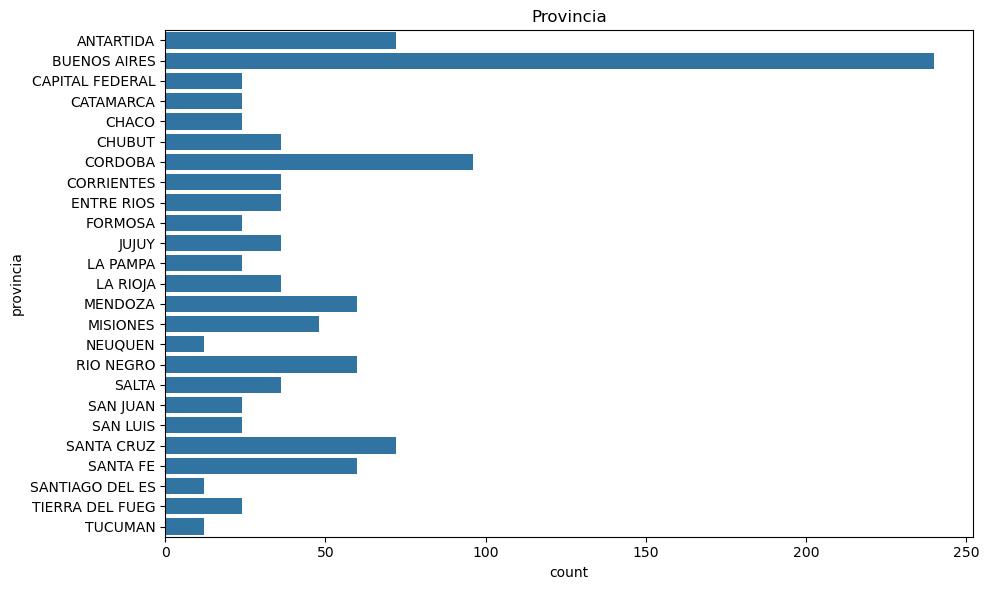

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.countplot(y='provincia', data=smn_historico, ax=ax)
ax.set_title('Provincia')
plt.tight_layout()
plt.show()

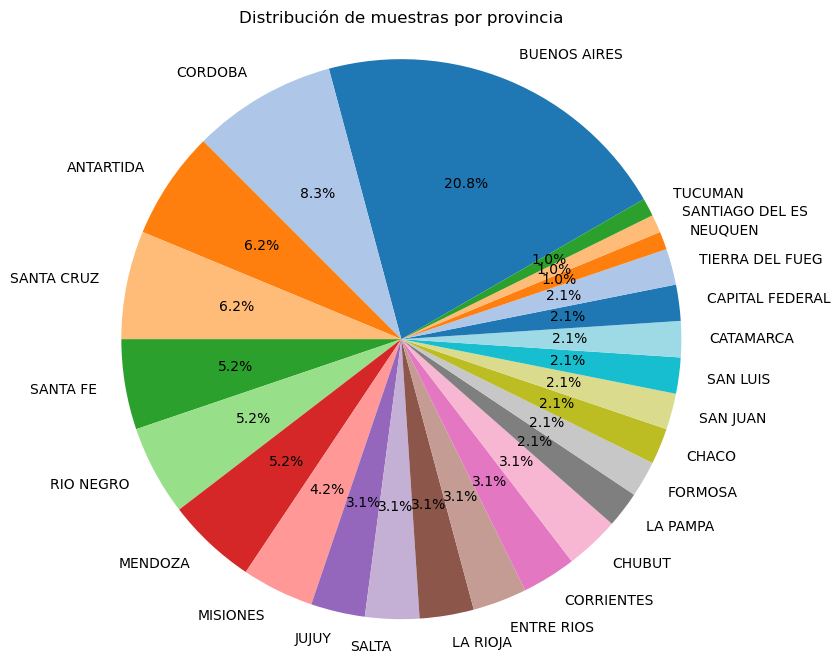

In [14]:
plt.figure(figsize=(10, 8))
provincia_counts = smn_historico['provincia'].value_counts()

colors = sns.color_palette('tab20', len(provincia_counts))
plt.pie(provincia_counts.values, 
        labels=provincia_counts.index,
        autopct='%1.1f%%',
        colors=colors,
        startangle=30)

plt.title('Distribución de muestras por provincia')
plt.axis('equal')
plt.show()

#### Entropía (provincia)

In [15]:
# Calculamos entropía
provincia_counts = smn_historico['provincia'].value_counts() # Cuento ocurrencias de cada categoría
provincia_pi = provincia_counts / provincia_counts.sum() # Calculo las pi (frecuencias relativas)

# Entropía máxima (si todas las categorías ocurrieran con la misma probabilidad)
H_max = np.log2(smn_historico['provincia'].nunique())

# Entropía de Shannon con Scipi
H_Shannon = entropy(provincia_pi, base=2)
print(f"Entropía H: {H_Shannon:.2f} - Entropia máxima H_max: {H_max:.2f}")


Entropía H: 4.20 - Entropia máxima H_max: 4.64


Resumen de hallazgos:
* Frecuencia absoluta de cada categoría: estación => 12 en cada categoría, mes_txt => 98 para cada mes, provincia => varía para cada una
* Cardinalidad de la variable provincia = 25 (23 provincias + CABA + Antártida)
* Frecuencia relativa de cada categoría: estación (cualquier categoría) = 12/1176 = 0.010, mes_txt = 98/1176 = 0,083.
* Rango de frecuencias: estación = 0, mes_txt = 0, provincia = 240 - 12 = 228
* Hay muchos más datos de Buenos Aires que de cualquier otra provincia, pero la entropía es bastante alta (quiere decir que hay diversidad de provincias).

---
### Variables numéricas: estadística descriptiva
---

In [16]:
# Para usar una función custom guardada en utils
import sys
import os

# Agrego el path para poder importar utils
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from utils.plotting import plot_histograma

In [17]:
smn_historico.describe()

,altura,numero,LAT_decimal,LON_decimal,prec_sup_1mm,humedad,nubosidad,prec_mm,temp,temp_max,temp_min,viento
count,1152.000000,1152.000000,1152.000000,1152.000000,1061.000000,1110.000000,1166.000000,1061.000000,1167.000000,1158.000000,1124.000000,708.000000
mean,328.812500,87570.031250,-36.347049,-62.623785,5.097455,68.005405,3.840137,68.234873,14.834190,21.223834,9.102847,13.011582
std,468.195292,450.772923,10.369416,5.591299,2.536586,11.027475,0.888284,51.674519,8.178787,8.938676,7.778743,5.554040
min,5.000000,87007.000000,-77.866667,-72.050000,0.000000,25.700000,1.300000,0.000000,-20.900000,-17.500000,-25.000000,3.900000
25%,45.250000,87284.250000,-38.437500,-66.458333,3.100000,61.325000,3.300000,23.300000,10.300000,17.025000,4.500000,9.200000
50%,141.000000,87520.500000,-34.500000,-63.183333,5.200000,70.100000,3.700000,58.900000,15.700000,22.400000,9.900000,11.800000
75%,450.000000,87697.750000,-29.891667,-58.775000,7.000000,76.400000,4.200000,106.500000,21.200000,27.900000,15.100000,15.900000
max,3459.000000,89066.000000,-22.100000,-34.616667,13.800000,90.200000,7.500000,277.900000,28.300000,35.500000,22.500000,36.500000


#### Histogramas

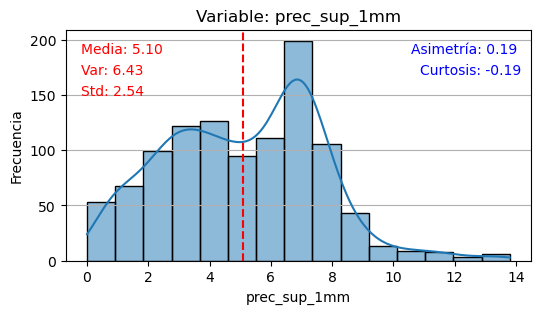

In [18]:
plot_histograma(smn_historico, 'prec_sup_1mm', snk=True)

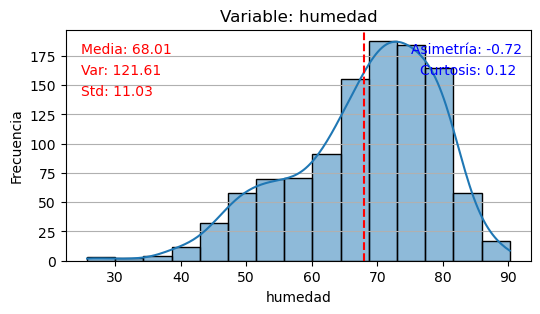

In [19]:
plot_histograma(smn_historico, 'humedad', snk=True)

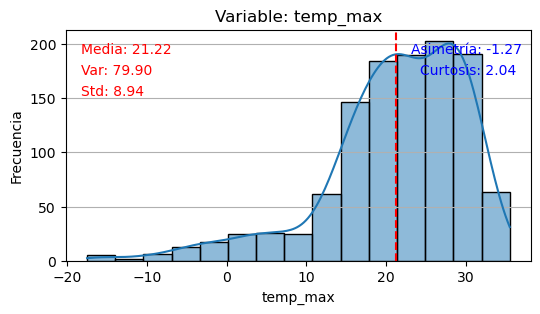

In [20]:
plot_histograma(smn_historico, 'temp_max', snk=True)

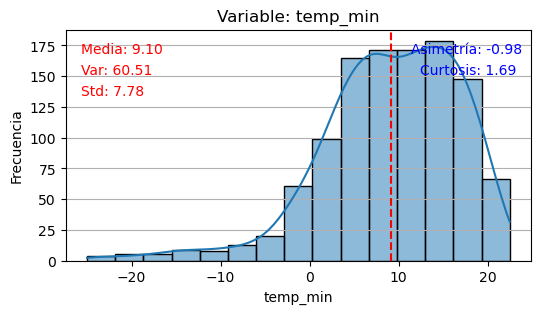

In [21]:
plot_histograma(smn_historico, 'temp_min', snk=True)

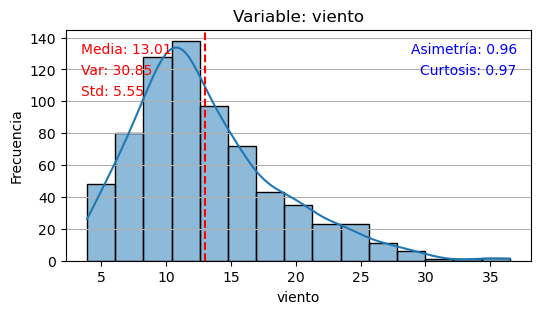

In [22]:
plot_histograma(smn_historico, 'viento', snk=True)

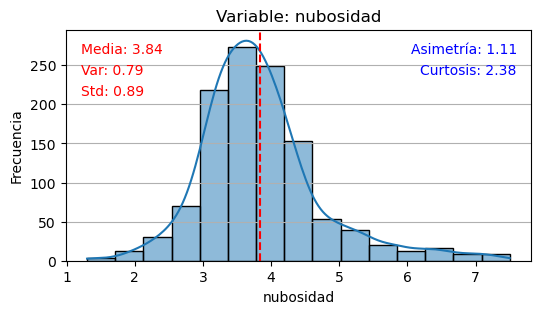

In [23]:
plot_histograma(smn_historico, 'nubosidad', snk=True)

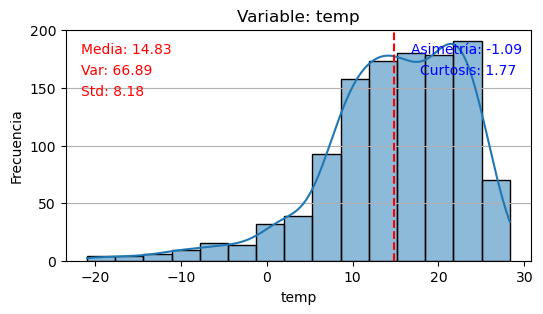

In [24]:
plot_histograma(smn_historico, 'temp', snk=True)

In [25]:
smn_historico

,estacion,provincia,altura,numero,NroOACI,LAT_decimal,LON_decimal,mes_txt,prec_sup_1mm,humedad,nubosidad,prec_mm,temp,temp_max,temp_min,viento
0,AEROPARQUE AERO,CAPITAL FEDERAL,6.0,87582.0,SABE,-34.550000,-58.416667,Ene,6.7,67.0,3.1,117.5,24.5,28.4,20.8,16.8
1,AEROPARQUE AERO,CAPITAL FEDERAL,6.0,87582.0,SABE,-34.550000,-58.416667,Feb,6.0,69.8,3.2,112.3,23.7,27.3,20.2,15.8
2,AEROPARQUE AERO,CAPITAL FEDERAL,6.0,87582.0,SABE,-34.550000,-58.416667,Mar,5.9,71.3,3.1,111.8,22.0,25.5,18.8,14.9
3,AEROPARQUE AERO,CAPITAL FEDERAL,6.0,87582.0,SABE,-34.550000,-58.416667,Abr,6.6,73.6,3.5,108.3,18.5,22.0,15.3,13.9
4,AEROPARQUE AERO,CAPITAL FEDERAL,6.0,87582.0,SABE,-34.550000,-58.416667,May,5.0,76.4,4.0,83.3,15.2,18.4,12.3,12.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,VILLA REYNOLDS AERO,SAN LUIS,486.0,87448.0,SAOR,-33.716667,-65.366667,Ago,2.4,63.3,3.4,15.6,9.7,20.2,1.5,11.2
1172,VILLA REYNOLDS AERO,SAN LUIS,486.0,87448.0,SAOR,-33.716667,-65.366667,Sep,4.0,60.9,3.6,35.4,13.1,22.6,4.6,12.6
1173,VILLA REYNOLDS AERO,SAN LUIS,486.0,87448.0,SAOR,-33.716667,-65.366667,Oct,7.1,63.0,3.9,65.8,16.9,25.2,8.9,16.3
1174,VILLA REYNOLDS AERO,SAN LUIS,486.0,87448.0,SAOR,-33.716667,-65.366667,Nov,8.8,62.0,3.8,92.4,20.0,28.1,11.9,15.1


#### KDE - temperatura vs provincia

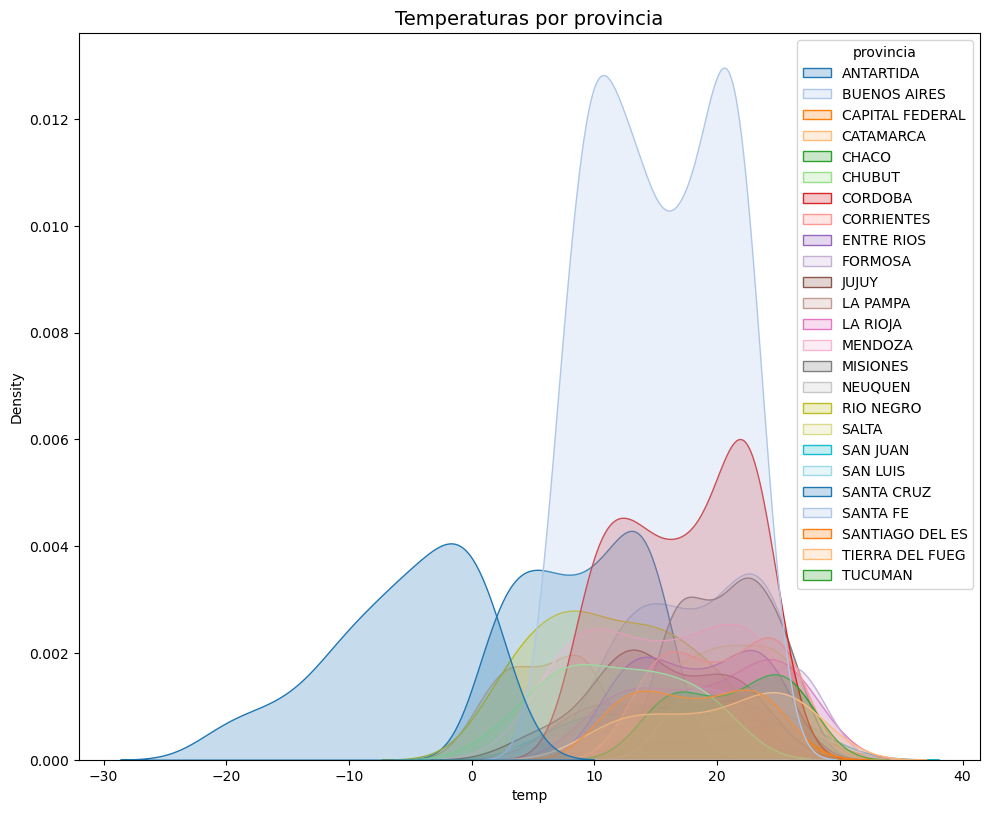

In [26]:
plt.figure(figsize=(10, 8))

sns.kdeplot(data=smn_historico, x='temp', hue='provincia', fill=True,
            palette='tab20')
plt.tight_layout()
plt.title('Temperaturas por provincia', fontsize=14)
plt.show()

#### Boxplots

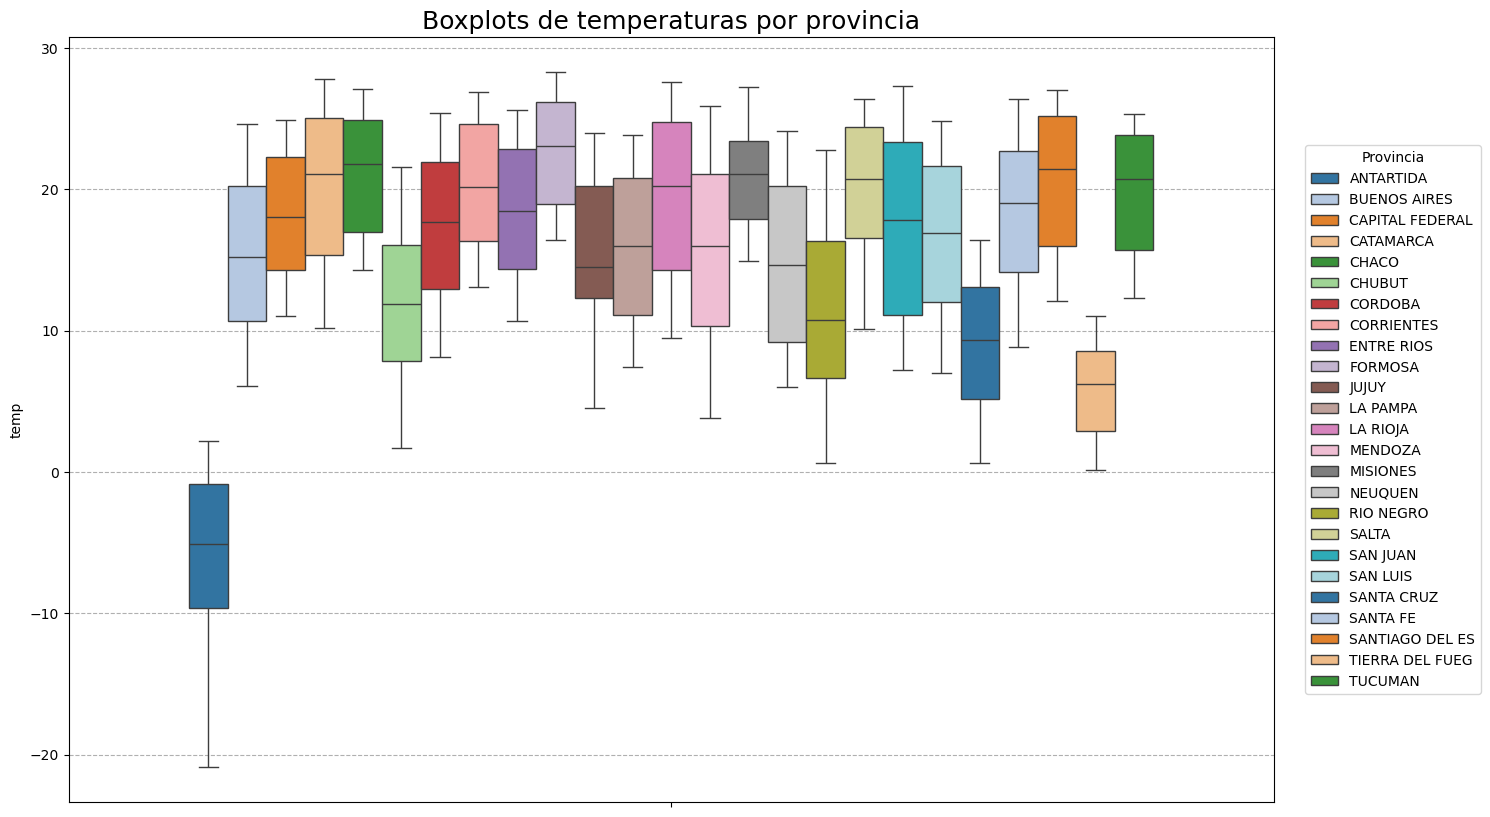

In [27]:
fig, ax = plt.subplots(figsize=(15, 8))

sns.boxplot(data=smn_historico, y='temp', hue='provincia', ax=ax,
            palette='tab20')         # con seaborn-0.13.2

ax.grid(axis='y', ls='--')

ax.legend(
    title='Provincia',
    loc='center left',            # ancla en el centro a la izquierda del bbox
    bbox_to_anchor=(1.02, 0.5)    # x=1.02 (a la derecha del gráfico), y=0.5 (centrada verticalmente)
)
plt.tight_layout()
plt.title('Boxplots de temperaturas por provincia', fontsize=18)
plt.show()

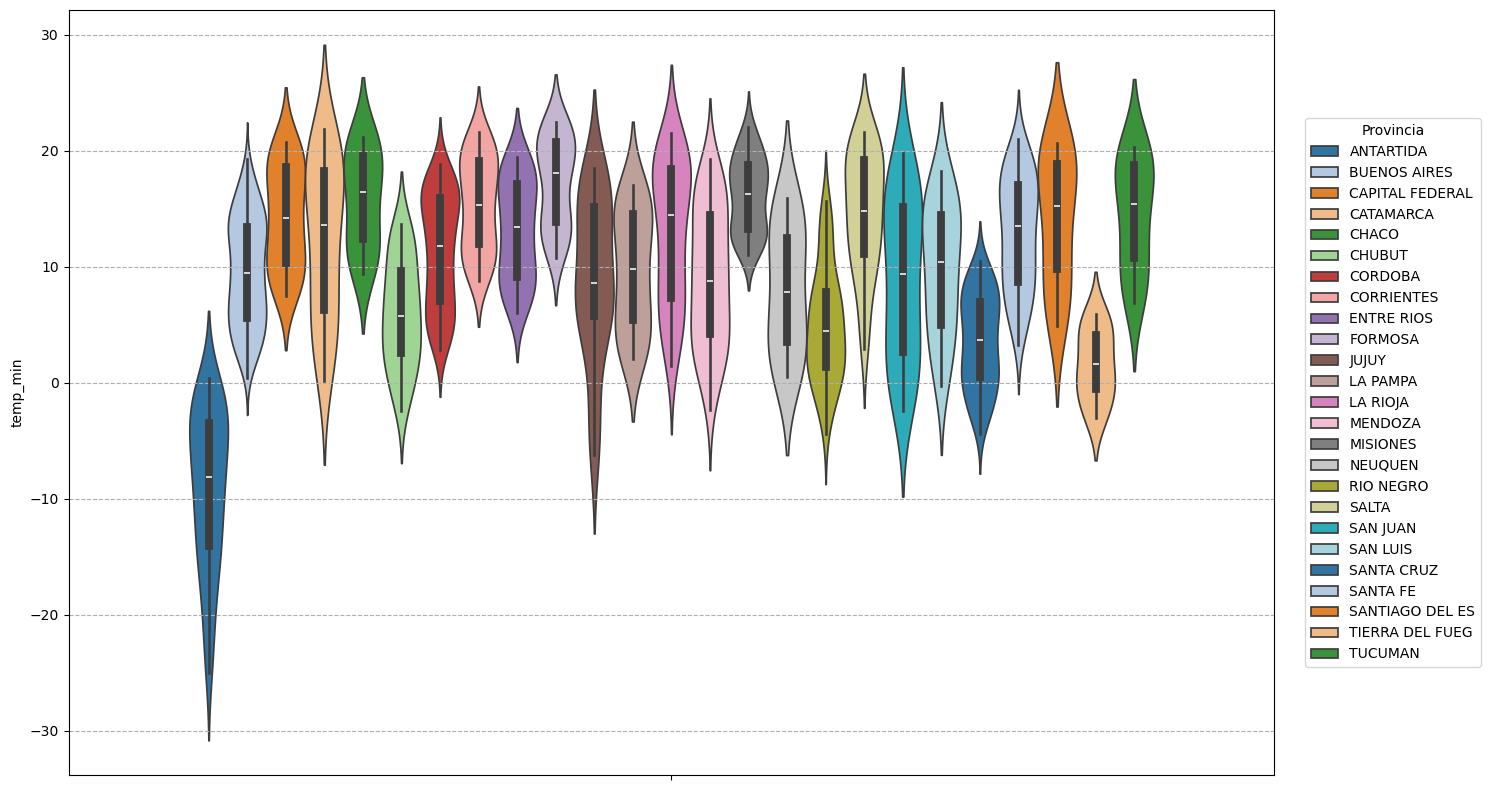

In [28]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.violinplot(data=smn_historico, y='temp_min', hue='provincia', ax=ax, palette='tab20', inner="box")
ax.legend(
    title='Provincia',
    loc='center left',            # ancla en el centro a la izquierda del bbox
    bbox_to_anchor=(1.02, 0.5)    # x=1.02 (a la derecha del gráfico), y=0.5 (centrada verticalmente)
)
ax.grid(axis='y', ls='--')
plt.tight_layout()
plt.show()

---
### Visualizaciones entre pares de variables
---

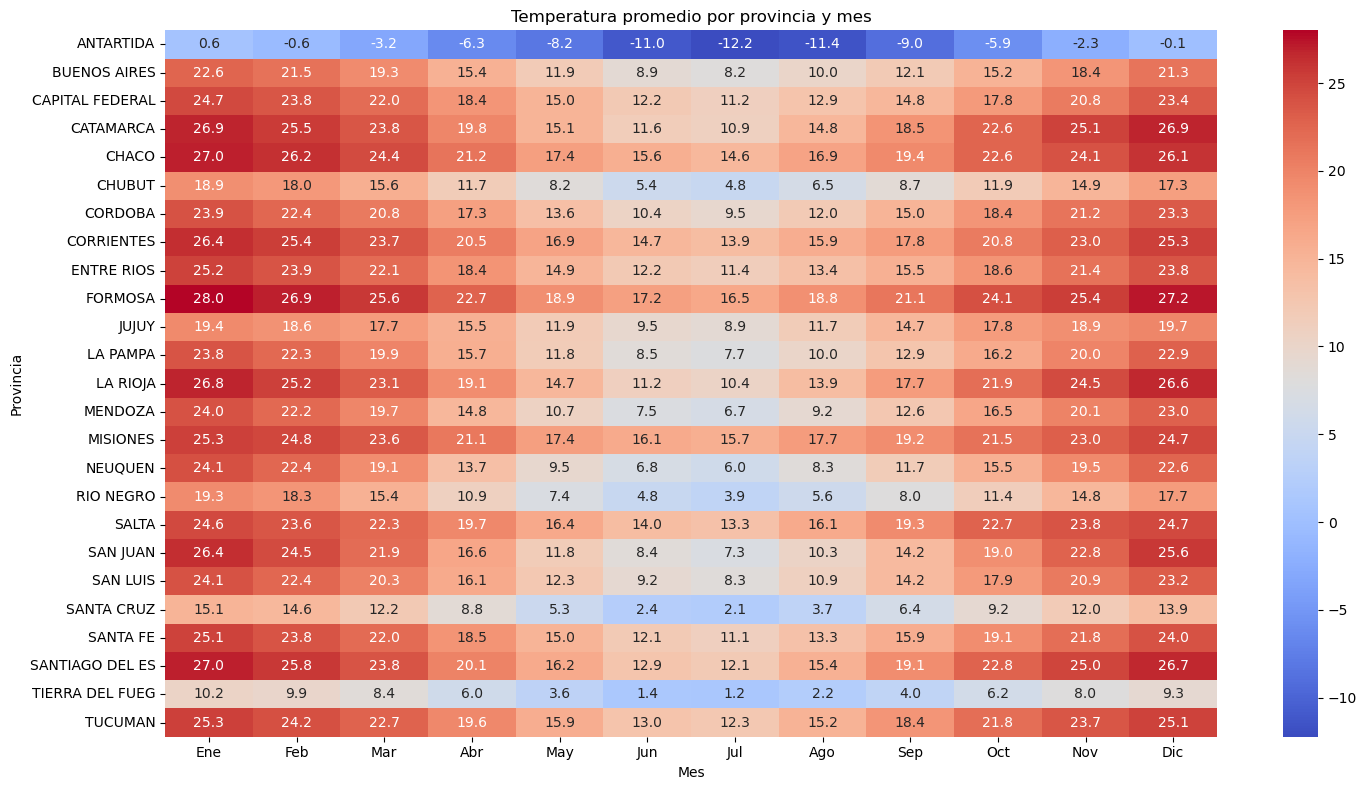

In [29]:
# orden correcto de meses en español
orden_meses = [
    'Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'
]

# convertir columna mes a categórica ordenada
smn_historico['mes_txt'] = pd.Categorical(
    smn_historico['mes_txt'],
    categories=orden_meses,
    ordered=True
)

# crear la tabla pivote
tabla = smn_historico.pivot_table(
    index='provincia',
    columns='mes_txt',
    values='temp',
    aggfunc='mean',
    observed=False
)

# heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(tabla, cmap='coolwarm', annot=True, fmt=".1f")

plt.title('Temperatura promedio por provincia y mes')
plt.xlabel('Mes')
plt.ylabel('Provincia')
plt.tight_layout()
plt.show()

---
## Datos faltantes
---

#### Calculo el total de datos faltantes

In [30]:
# Serie con los valores faltantes
faltantes = smn_historico.isna().sum()

# Calculamos porcentaje de valores faltantes
total_filas = len(smn_historico)
faltantes_df = faltantes.to_frame(name='faltantes')
faltantes_df['porcentaje'] = ((faltantes_df['faltantes'] / total_filas) * 100).round(2)
faltantes_df = faltantes_df.sort_values(by='faltantes', ascending=False)

# Mostramos solo las que tienen valores faltantes
faltantes_df[faltantes_df['faltantes'] > 0]

,faltantes,porcentaje
viento,468,39.80
prec_sup_1mm,115,9.78
prec_mm,115,9.78
humedad,66,5.61
temp_min,52,4.42
NroOACI,36,3.06
provincia,24,2.04
altura,24,2.04
numero,24,2.04
LAT_decimal,24,2.04


<Axes: >

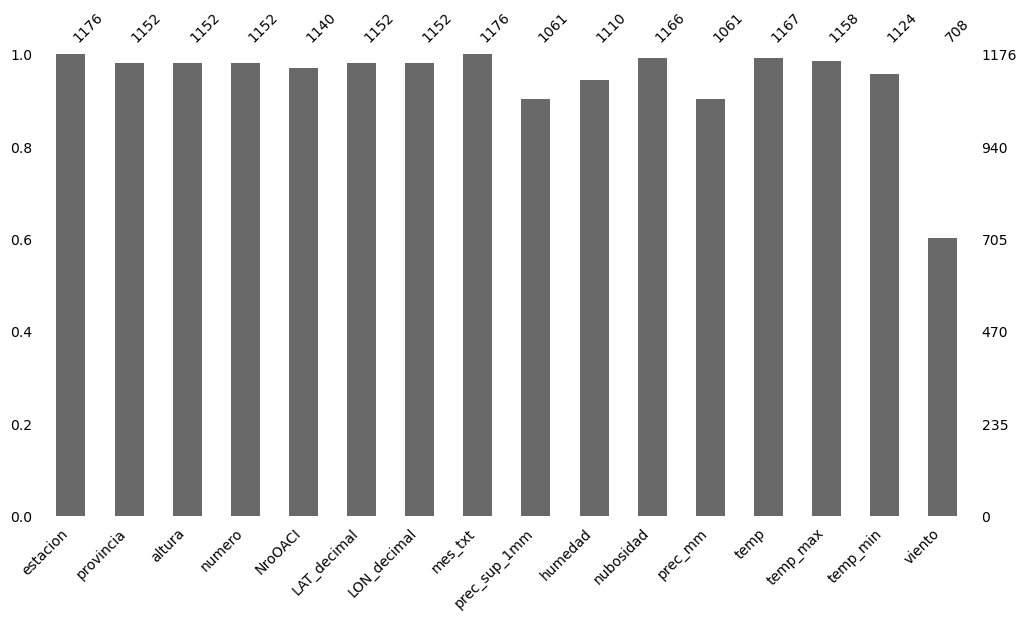

In [31]:
msno.bar(smn_historico, figsize=(12, 6), fontsize=10)

<Axes: >

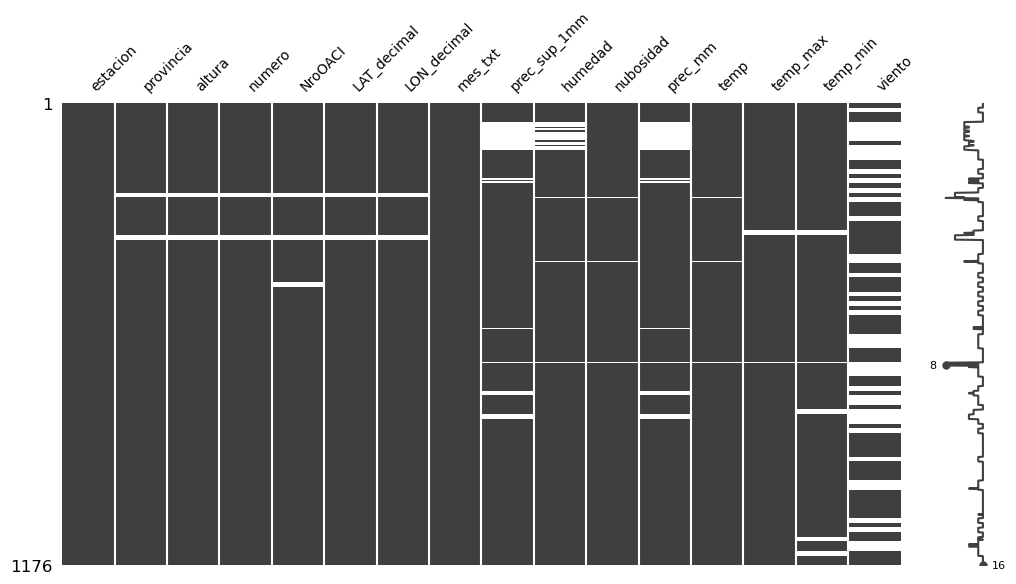

In [32]:
msno.matrix(smn_historico, figsize=(12, 6), sparkline=True, fontsize=10)

<Axes: >

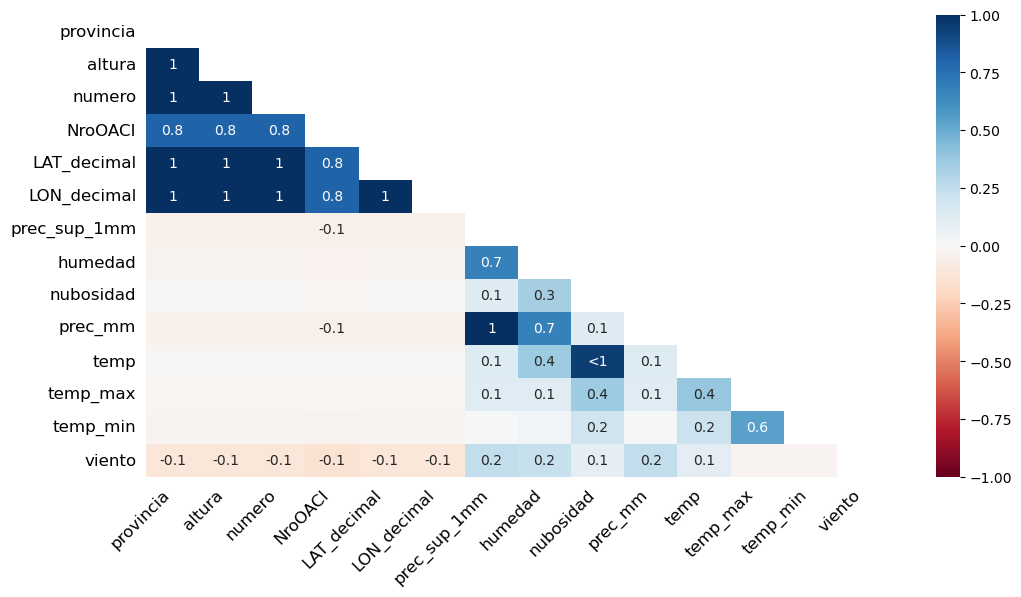

In [33]:
msno.heatmap(smn_historico, figsize=(12, 6), fontsize=12)

<Axes: >

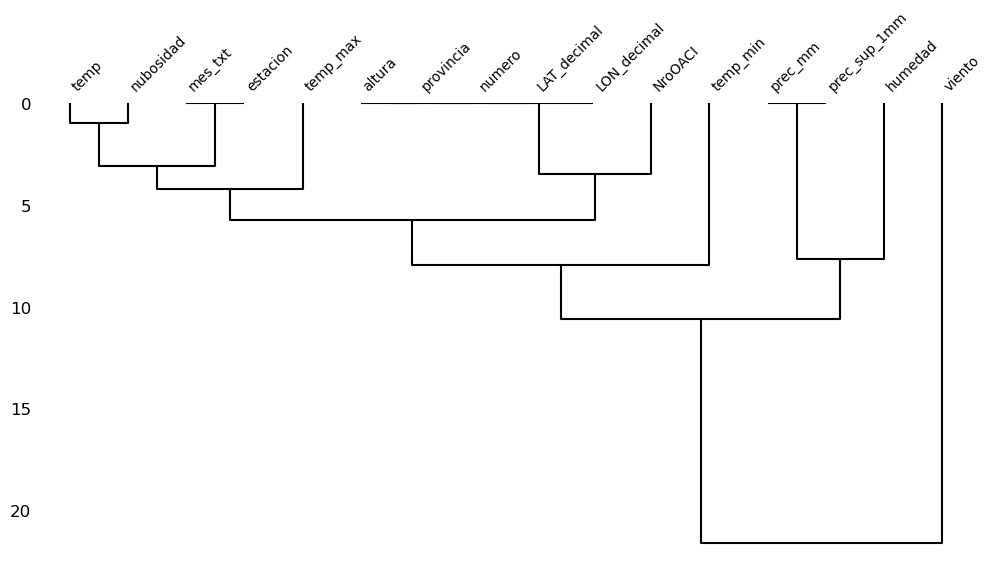

In [34]:
msno.dendrogram(smn_historico, figsize=(12, 6), fontsize=10)

In [35]:
# Creamos una función para calcular el porcentaje de nulos en una columna, agrupando por una o más columnas
def nulos_por_grupo(df, grupo_cols, target_col):
    agrupar_nulos = (
        df.groupby(grupo_cols, observed=True)[target_col]
        .apply(lambda x: x.isnull().mean() * 100)
        .reset_index(name=f'porcentaje_nulos_{target_col}')
    )

    return agrupar_nulos[agrupar_nulos[f'porcentaje_nulos_{target_col}'] > 0]

In [36]:
# Ejemplos de análisis que podemos hacer para 'viento'
nulos_viento_por_estacion = nulos_por_grupo(smn_historico,'estacion','viento')
nulos_viento_por_provincia = nulos_por_grupo(smn_historico, 'provincia', 'viento')
nulos_viento_por_mes = nulos_por_grupo(smn_historico,  'mes_txt', 'viento')


In [37]:
# Resultados - porcentaje de nulos por estación:
nulos_viento_por_estacion

,estacion,porcentaje_nulos_viento
1,AZUL AERO,100.0
4,BASE BELGRANO II,100.0
5,BASE CARLINI (EX JUBANY),100.0
6,BASE ESPERANZA,100.0
7,BASE MARAMBIO,100.0
9,BASE SAN MARTIN,100.0
10,BERNARDO DE IRIGOYEN AERO,100.0
11,BOLIVAR AERO,100.0
14,CERES AERO,100.0
16,CHILECITO AERO,100.0


In [38]:
# Resultados - porcentaje de nulos por provincia:
nulos_viento_por_provincia

,provincia,porcentaje_nulos_viento
0,ANTARTIDA,83.333333
1,BUENOS AIRES,60.000000
3,CATAMARCA,50.000000
4,CHACO,100.000000
6,CORDOBA,25.000000
8,ENTRE RIOS,33.333333
11,LA PAMPA,50.000000
12,LA RIOJA,66.666667
13,MENDOZA,60.000000
14,MISIONES,50.000000


In [39]:
# Resultados - porcentaje de nulos por mes:
nulos_viento_por_mes

,mes_txt,porcentaje_nulos_viento
0,Ene,39.795918
1,Feb,39.795918
2,Mar,39.795918
3,Abr,39.795918
4,May,39.795918
5,Jun,39.795918
6,Jul,39.795918
7,Ago,39.795918
8,Sep,39.795918
9,Oct,39.795918


* Los datos de viento faltan para 94 estaciones. Esto requiere mayor investigación, ya que podría deberse a que esas estaciones no miden viento o no lo reportan (podrían no ser faltantes sino una cuestión de diseño). En este caso, podemos considerar la falta de tipo MAR.

#### Análisis de tipo de faltantes para las variables 'prec_mm' y prec_sup_1mm (se mueven juntas)

In [40]:
# Analizamos prec_mm en función de la estación
nulos_por_grupo(smn_historico,['estacion','provincia'],'prec_mm')

,estacion,provincia,porcentaje_nulos_prec_mm
4,BASE BELGRANO II,ANTARTIDA,100.000000
5,BASE CARLINI (EX JUBANY),ANTARTIDA,100.000000
6,BASE ESPERANZA,ANTARTIDA,100.000000
7,BASE MARAMBIO,ANTARTIDA,100.000000
8,BASE ORCADAS,ANTARTIDA,100.000000
9,BASE SAN MARTIN,ANTARTIDA,100.000000
16,CHILECITO AERO,LA RIOJA,41.666667
21,CORONEL SUAREZ AERO,BUENOS AIRES,8.333333
26,EL PALOMAR AERO,BUENOS AIRES,8.333333
45,MAQUINCHAO,RIO NEGRO,16.666667


In [41]:
# Analizamos prec_mm en función del mes del año
nulos_por_grupo(smn_historico,['mes_txt'],'prec_mm')

,mes_txt,porcentaje_nulos_prec_mm
0,Ene,10.204082
1,Feb,10.204082
2,Mar,10.204082
3,Abr,8.163265
4,May,8.163265
5,Jun,8.163265
6,Jul,12.244898
7,Ago,10.204082
8,Sep,9.183673
9,Oct,9.183673


* Parece que la falta no está asociada a un mes específico del año.
* El dato falta siempre en las estaciones de la Antártida y de Santa Cruz --> MAR?


#### Análisis de faltantes para la variable 'humedad'

In [42]:
nulos_por_grupo(smn_historico,['estacion','provincia'],'humedad')

,estacion,provincia,porcentaje_nulos_humedad
4,BASE BELGRANO II,ANTARTIDA,100.000000
5,BASE CARLINI (EX JUBANY),ANTARTIDA,58.333333
6,BASE ESPERANZA,ANTARTIDA,75.000000
7,BASE MARAMBIO,ANTARTIDA,83.333333
8,BASE ORCADAS,ANTARTIDA,66.666667
9,BASE SAN MARTIN,ANTARTIDA,75.000000
16,CHILECITO AERO,LA RIOJA,8.333333
21,CORONEL SUAREZ AERO,BUENOS AIRES,25.000000
31,GOBERNADOR GREGORES AERO,SANTA CRUZ,16.666667
54,OBERA,MISIONES,33.333333


In [43]:
nulos_por_grupo(smn_historico,['mes_txt'],'humedad')

,mes_txt,porcentaje_nulos_humedad
0,Ene,3.061224
1,Feb,4.081633
2,Mar,4.081633
3,Abr,7.142857
4,May,6.122449
5,Jun,6.122449
6,Jul,10.204082
7,Ago,8.163265
8,Sep,6.122449
9,Oct,6.122449


In [44]:
# Analizamos faltantes simultáneos en prec_mm y humedad (ya que están correlacionados de acuerdo al output de missigno)

faltantes_hum_prec = smn_historico[smn_historico['prec_mm'].isna() & smn_historico['humedad'].isna()]

nulos_por_grupo(faltantes_hum_prec,['estacion', 'provincia'],'humedad')

,estacion,provincia,porcentaje_nulos_humedad
0,BASE BELGRANO II,ANTARTIDA,100.0
1,BASE CARLINI (EX JUBANY),ANTARTIDA,100.0
2,BASE ESPERANZA,ANTARTIDA,100.0
3,BASE MARAMBIO,ANTARTIDA,100.0
4,BASE ORCADAS,ANTARTIDA,100.0
5,BASE SAN MARTIN,ANTARTIDA,100.0
6,CORONEL SUAREZ AERO,BUENOS AIRES,100.0
7,OBERA,MISIONES,100.0
8,PERITO MORENO AERO,SANTA CRUZ,100.0


In [45]:
nulos_por_grupo(faltantes_hum_prec,['mes_txt'],'humedad')

,mes_txt,porcentaje_nulos_humedad
0,Ene,100.0
1,Feb,100.0
2,Mar,100.0
3,Abr,100.0
4,May,100.0
5,Jun,100.0
6,Jul,100.0
7,Ago,100.0
8,Sep,100.0
9,Oct,100.0


* Los Los faltantes en humedad no parecen estar fuertemente asociados a un mes específico del año, aunque ocurren más en invierno (julio y agosto).
* Los faltantes en humedad no parecen ser aleatorios (no serían MCAR), ya que hay distintos porcentajes de faltantes según la estación meteorológica.
* Los faltantes en humedad y precipitación que suceden juntos, están concentrados en 7 estaciones y no parecen estar asociados a un mes específico del año. 
* Dada la información anterior, podrían considerarse MAR.

#### Análisis de faltantes de la variable 'temp_min'

In [46]:
nulos_por_grupo(smn_historico,['mes_txt'],'temp_min')

,mes_txt,porcentaje_nulos_temp_min
0,Ene,5.102041
1,Feb,6.122449
2,Mar,4.081633
3,Abr,4.081633
4,May,4.081633
5,Jun,4.081633
6,Jul,4.081633
7,Ago,5.102041
8,Sep,4.081633
9,Oct,4.081633


In [47]:
nulos_por_grupo(smn_historico,['estacion'],'temp_min')

,estacion,porcentaje_nulos_temp_min
22,CORONEL SUAREZ AERO,8.333333
27,EL PALOMAR AERO,100.000000
56,OBERA,33.333333
66,PRESIDENCIA ROQUE SAENZ PEÑA AERO,100.000000
92,USHUAIA AERO,91.666667
95,VILLA DE MARIA DEL RIO SECO,100.000000


* Parece haber un patrón de faltantes asociado a ciertas estaciones meteorológicas, y no al mes del año.

#### Analizamos los faltantes en la variable 'NroOACI'

In [48]:
# Analizamos NroOACI en función de la estación
nulos_por_grupo(smn_historico,['estacion'],'NroOACI')

,estacion,porcentaje_nulos_NroOACI
21,CORONEL PRINGLES AERO,100.0
28,EL TREBOL,100.0
38,JUJUY U N,100.0


* Luego de hacer una pequeña investigación en Internet, se descubre que estas estaciones no tienen OACI (Organización de Aviación Civil internacional) asignado (no son realmente faltantes).

#### Análisis de faltantes de la variable 'temp_max'

In [49]:
# Analizamos temp_max función de la estación
nulos_por_grupo(smn_historico,['estacion'],'temp_max')

,estacion,porcentaje_nulos_temp_max
22,CORONEL SUAREZ AERO,8.333333
27,EL PALOMAR AERO,100.000000
56,OBERA,33.333333
62,PERITO MORENO AERO,8.333333


In [50]:
# Analizamos NroOACI en función del mes del año
nulos_por_grupo(smn_historico,['mes_txt'],'temp_max')

,mes_txt,porcentaje_nulos_temp_max
0,Ene,2.040816
1,Feb,3.061224
2,Mar,1.020408
3,Abr,1.020408
4,May,1.020408
5,Jun,2.040816
6,Jul,2.040816
7,Ago,2.040816
8,Sep,1.020408
9,Oct,1.020408


* Los faltantes parecen estar asociados a la estación meteorológica.

#### Análisis de faltantes de la variable 'nubosidad'

In [51]:
# Analizamos 'nubosidad' en función de la estación
nulos_por_grupo(smn_historico,['estacion'],'nubosidad')

,estacion,porcentaje_nulos_nubosidad
22,CORONEL SUAREZ AERO,25.000000
33,GOBERNADOR GREGORES AERO,16.666667
56,OBERA,33.333333
87,TARTAGAL AERO,8.333333


In [52]:
# Analizamos 'nubosidad' en función de la estación y del mes
nulos_por_grupo(smn_historico,['mes_txt', 'estacion'],'nubosidad')

,mes_txt,estacion,porcentaje_nulos_nubosidad
22,Ene,CORONEL SUAREZ AERO,100.0
56,Ene,OBERA,100.0
120,Feb,CORONEL SUAREZ AERO,100.0
154,Feb,OBERA,100.0
283,Mar,TARTAGAL AERO,100.0
610,Jul,CORONEL SUAREZ AERO,100.0
621,Jul,GOBERNADOR GREGORES AERO,100.0
644,Jul,OBERA,100.0
719,Ago,GOBERNADOR GREGORES AERO,100.0
742,Ago,OBERA,100.0


#### Análisis de faltantes de la variable 'temp'

In [53]:
# Analizamos 'temp' en función de la estación
nulos_por_grupo(smn_historico,['estacion'],'temp')

,estacion,porcentaje_nulos_temp
22,CORONEL SUAREZ AERO,25.000000
33,GOBERNADOR GREGORES AERO,16.666667
56,OBERA,33.333333


In [54]:
# Analizamos 'temp' en función del mes de año y la estación
nulos_por_grupo(smn_historico,['mes_txt', 'estacion'],'temp')

,mes_txt,estacion,porcentaje_nulos_temp
22,Ene,CORONEL SUAREZ AERO,100.0
56,Ene,OBERA,100.0
120,Feb,CORONEL SUAREZ AERO,100.0
154,Feb,OBERA,100.0
610,Jul,CORONEL SUAREZ AERO,100.0
621,Jul,GOBERNADOR GREGORES AERO,100.0
644,Jul,OBERA,100.0
719,Ago,GOBERNADOR GREGORES AERO,100.0
742,Ago,OBERA,100.0


* Parece haber un patrón - los faltantes solo ocurren en ciertas estaciones y en ciertos meses del año.

#### Por último, los faltantes de provincia, latitud, longitud y altura faltan juntos pero se pueden completar porque se tiene el nombre de la estación a la que corresponden (Pringles y El Trébol).

In [55]:
# Filtro los nulos en provincia y los cuento por estación. Muestro únicamente los que son >0
smn_historico[smn_historico['provincia'].isna()].value_counts(subset=['estacion'])[lambda x: x > 0] 

estacion             
EL TREBOL                12
CORONEL PRINGLES AERO    12
Name: count, dtype: int64

---
## Outliers
---

In [56]:
smn_historico.describe()

,altura,numero,LAT_decimal,LON_decimal,prec_sup_1mm,humedad,nubosidad,prec_mm,temp,temp_max,temp_min,viento
count,1152.000000,1152.000000,1152.000000,1152.000000,1061.000000,1110.000000,1166.000000,1061.000000,1167.000000,1158.000000,1124.000000,708.000000
mean,328.812500,87570.031250,-36.347049,-62.623785,5.097455,68.005405,3.840137,68.234873,14.834190,21.223834,9.102847,13.011582
std,468.195292,450.772923,10.369416,5.591299,2.536586,11.027475,0.888284,51.674519,8.178787,8.938676,7.778743,5.554040
min,5.000000,87007.000000,-77.866667,-72.050000,0.000000,25.700000,1.300000,0.000000,-20.900000,-17.500000,-25.000000,3.900000
25%,45.250000,87284.250000,-38.437500,-66.458333,3.100000,61.325000,3.300000,23.300000,10.300000,17.025000,4.500000,9.200000
50%,141.000000,87520.500000,-34.500000,-63.183333,5.200000,70.100000,3.700000,58.900000,15.700000,22.400000,9.900000,11.800000
75%,450.000000,87697.750000,-29.891667,-58.775000,7.000000,76.400000,4.200000,106.500000,21.200000,27.900000,15.100000,15.900000
max,3459.000000,89066.000000,-22.100000,-34.616667,13.800000,90.200000,7.500000,277.900000,28.300000,35.500000,22.500000,36.500000


In [57]:
# Método  de rango intercuartil para detectar outliers
columnas = ['altura','LAT_decimal','LON_decimal',
            'temp', 'temp_max', 'temp_min',
            'nubosidad','humedad','prec_mm','prec_sup_1mm']
df_outliers = smn_historico[columnas]
            
Q1 = df_outliers.quantile(0.25)
Q3 = df_outliers.quantile(0.75)
IQR = Q3 - Q1

# Crea un diccionario con los límites inferior y superior de cada variable
outlier_limits = {
    col: (Q1[col] - 1.5 * IQR[col], Q3[col] + 1.5 * IQR[col])
    for col in df_outliers.columns
}

In [58]:
outlier_limits

{'altura': (-561.875, 1057.125),
 'LAT_decimal': (-51.25625, -17.072916666666664),
 'LON_decimal': (-77.98333333333332, -47.25),
 'temp': (-6.049999999999997, 37.55),
 'temp_max': (0.7124999999999986, 44.2125),
 'temp_min': (-11.399999999999999, 31.0),
 'nubosidad': (1.9499999999999993, 5.550000000000001),
 'humedad': (38.71249999999998, 99.01250000000002),
 'prec_mm': (-101.50000000000001, 231.3),
 'prec_sup_1mm': (-2.7499999999999996, 12.85)}

#### Visualización con Boxplots y exploración de outliers

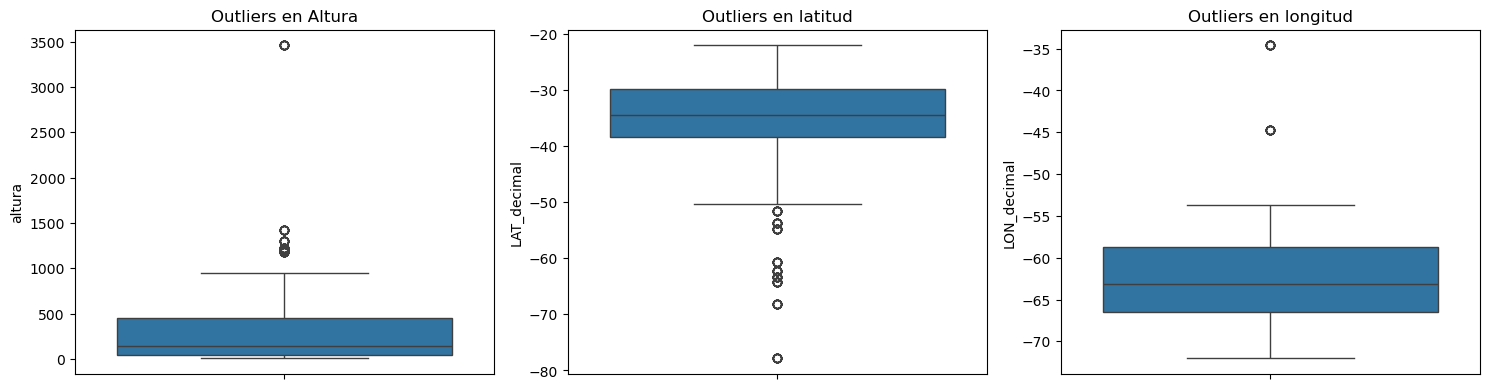

In [59]:
# Estaciones meteorológicas

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Boxplot para 'altura'
sns.boxplot(y=smn_historico['altura'], ax=axes[0])
axes[0].set_title('Outliers en Altura')

# Boxplot para 'Lat'
sns.boxplot(y=smn_historico['LAT_decimal'], ax=axes[1])
axes[1].set_title('Outliers en latitud')

# Boxplot para 'Lon'
sns.boxplot(y=smn_historico['LON_decimal'], ax=axes[2])
axes[2].set_title('Outliers en longitud')

plt.tight_layout()
plt.show()

In [60]:
(altura_min, altura_max) = outlier_limits['altura']
(LAT_min, LAT_max) = outlier_limits['LAT_decimal']
(LON_min, LON_max) = outlier_limits['LON_decimal']

In [61]:
smn_historico[smn_historico['altura']>altura_max][['estacion', 'provincia', 'altura', 'LAT_decimal', 'LON_decimal']].drop_duplicates()

,estacion,provincia,altura,LAT_decimal,LON_decimal
432,JACHAL,SAN JUAN,1175.0,-30.216667,-68.733333
456,JUJUY U N,JUJUY,1302.0,-24.166667,-65.316667
492,LA QUIACA OBSERVATORIO,JUJUY,3459.0,-22.100000,-65.600000
552,MALARGUE AERO,MENDOZA,1425.0,-35.466667,-69.583333
888,SALTA AERO,SALTA,1221.0,-24.833333,-65.466667
1056,TINOGASTA,CATAMARCA,1201.0,-28.066667,-67.550000


In [62]:
smn_historico[smn_historico['LAT_decimal']<LAT_min][['estacion', 'provincia', 'altura', 'LAT_decimal', 'LON_decimal']].drop_duplicates()

,estacion,provincia,altura,LAT_decimal,LON_decimal
48,BASE BELGRANO II,ANTARTIDA,256.0,-77.866667,-34.616667
60,BASE CARLINI (EX JUBANY),ANTARTIDA,11.0,-62.233333,-58.650000
72,BASE ESPERANZA,ANTARTIDA,24.0,-63.383333,-56.983333
84,BASE MARAMBIO,ANTARTIDA,198.0,-64.233333,-56.616667
96,BASE ORCADAS,ANTARTIDA,12.0,-60.733333,-44.733333
108,BASE SAN MARTIN,ANTARTIDA,7.0,-68.116667,-67.100000
864,RIO GALLEGOS AERO,SANTA CRUZ,19.0,-51.600000,-69.300000
876,RIO GRANDE B.A.,TIERRA DEL FUEG,22.0,-53.766667,-67.750000
1104,USHUAIA AERO,TIERRA DEL FUEG,57.0,-54.833333,-68.300000


In [63]:
smn_historico[smn_historico['LON_decimal']>LON_max][['estacion', 'provincia', 'altura', 'LAT_decimal', 'LON_decimal']].drop_duplicates()

,estacion,provincia,altura,LAT_decimal,LON_decimal
48,BASE BELGRANO II,ANTARTIDA,256.0,-77.866667,-34.616667
96,BASE ORCADAS,ANTARTIDA,12.0,-60.733333,-44.733333


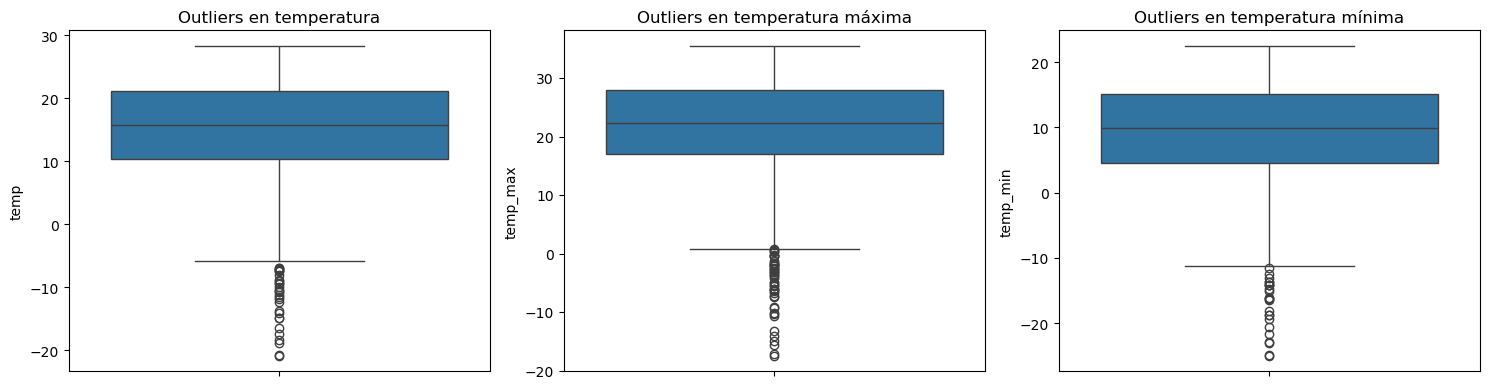

In [64]:
# Temperatura

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Boxplot para temperatura
sns.boxplot(y=smn_historico['temp'], ax=axes[0])
axes[0].set_title('Outliers en temperatura')

# Boxplot para temp. max.
sns.boxplot(y=smn_historico['temp_max'], ax=axes[1])
axes[1].set_title('Outliers en temperatura máxima')

# Boxplot para temp. min.
sns.boxplot(y=smn_historico['temp_min'], ax=axes[2])
axes[2].set_title('Outliers en temperatura mínima')

plt.tight_layout()
plt.show()

In [65]:
(temp_min, temp_max) = outlier_limits['temp']
(temp_min_min, temp_min_max) = outlier_limits['temp_min']
(temp_max_min, temp_max_max) = outlier_limits['temp_max']

In [66]:
smn_historico[(smn_historico['temp']<temp_min) | (smn_historico['temp_max']<temp_max_min) | (smn_historico['temp_min']<temp_min_min)][['estacion']].drop_duplicates()

,estacion
48,BASE BELGRANO II
64,BASE CARLINI (EX JUBANY)
75,BASE ESPERANZA
86,BASE MARAMBIO
99,BASE ORCADAS
111,BASE SAN MARTIN


#### Análisis de outliers de temperaturas basado en media y desvío estándar

In [67]:
columnas = ['temp', 'temp_max', 'temp_min']
mean = smn_historico[columnas].mean()
std = smn_historico[columnas].apply(lambda x: np.nanstd(x, ddof=1))

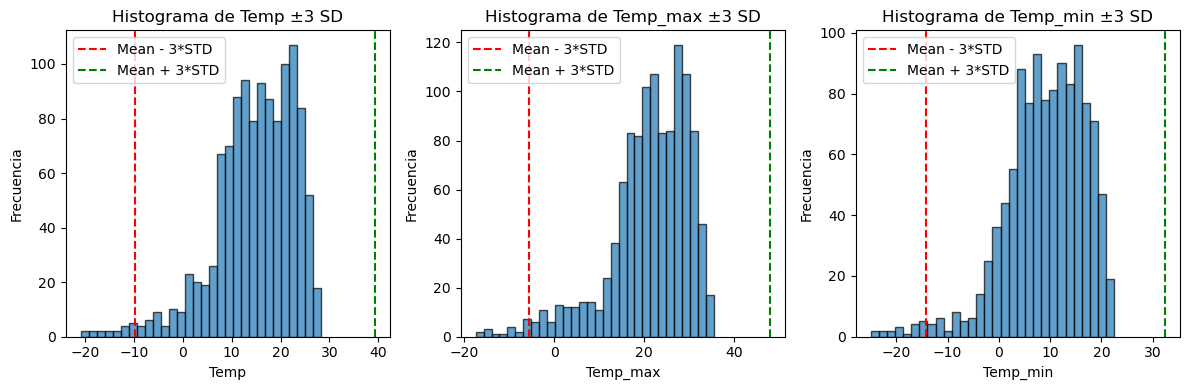

In [68]:
def plot_hist_with_std(ax, data, varname, mean, std):
    ax.hist(data, bins=30, edgecolor='black', alpha=0.7)
    ax.axvline(mean[varname] - 3*std[varname], color='red', linestyle='--', label='Mean - 3*STD')
    ax.axvline(mean[varname] + 3*std[varname], color='green', linestyle='--', label='Mean + 3*STD')
    ax.set_xlabel(varname.capitalize())
    ax.set_ylabel('Frecuencia')
    ax.set_title(f'Histograma de {varname.capitalize()} ±3 SD')
    ax.legend()

fig, ax = plt.subplots(1, 3, figsize=(12, 4))

plot_hist_with_std(ax[0], smn_historico['temp'], 'temp', mean, std)
plot_hist_with_std(ax[1], smn_historico['temp_max'], 'temp_max', mean, std)
plot_hist_with_std(ax[2], smn_historico['temp_min'], 'temp_min', mean, std)

plt.tight_layout()
plt.show()

In [69]:
# Método basado en desviación estándar
mean = smn_historico[columnas].mean()
std = smn_historico[columnas].apply(lambda x: np.nanstd(x, ddof=1))

outliers_std = (smn_historico[columnas] < (mean - 3 * std)) | (smn_historico[columnas] > (mean + 3 * std))

print(f"Outliers\nTemperatura: <{mean['temp'] - 3 * std['temp']:.02f} o >{mean['temp'] + 3 * std['temp']:.02f}")
print(f"Temp.max.: <{mean['temp_max'] - 3 * std['temp_max']:.02f} o >{mean['temp_max'] + 3 * std['temp_max']:.02f}")
print(f"Temp.min.: <{mean['temp_min'] - 3 * std['temp_min']:.02f} o >{mean['temp_min'] + 3 * std['temp_min']:.02f}")

Outliers
Temperatura: <-9.70 o >39.37
Temp.max.: <-5.59 o >48.04
Temp.min.: <-14.23 o >32.44


In [70]:
smn_historico[(smn_historico['temp']<-9.70) | (smn_historico['temp_max']<-5.59) | (smn_historico['temp_min']<-14.23)][['estacion']].drop_duplicates()

,estacion
50,BASE BELGRANO II
77,BASE ESPERANZA
87,BASE MARAMBIO
114,BASE SAN MARTIN


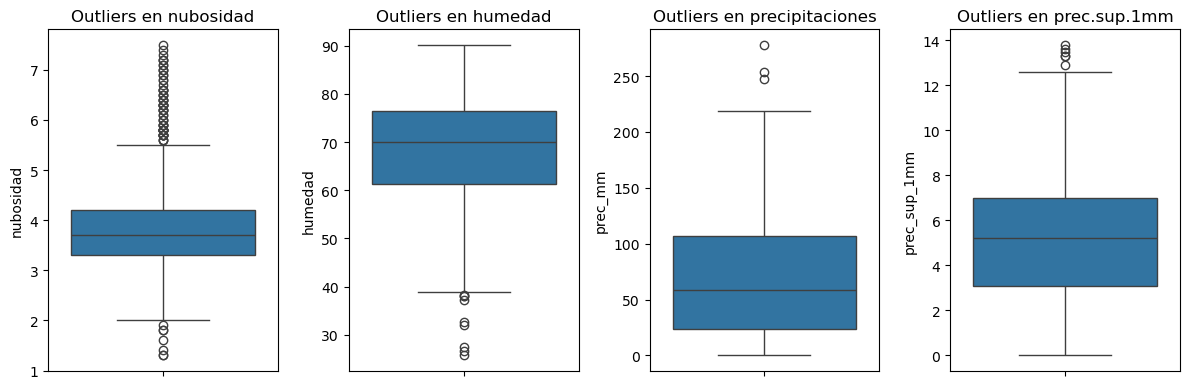

In [71]:
# Otras variables

fig, axes = plt.subplots(1, 4, figsize=(12,4))

# Boxplot para nubosidad
sns.boxplot(y=smn_historico['nubosidad'], ax=axes[0])
axes[0].set_title('Outliers en nubosidad')

# Boxplot para humedad
sns.boxplot(y=smn_historico['humedad'], ax=axes[1])
axes[1].set_title('Outliers en humedad')

# Boxplot para prec_mm
sns.boxplot(y=smn_historico['prec_mm'], ax=axes[2])
axes[2].set_title('Outliers en precipitaciones')

# Boxplot para prec_sup_1mm
sns.boxplot(y=smn_historico['prec_sup_1mm'], ax=axes[3])
axes[3].set_title('Outliers en prec.sup.1mm')

plt.tight_layout()
plt.show()

In [72]:
(nubosidad_min, nubosidad_max) = outlier_limits['nubosidad']
(nubosidad_min, nubosidad_max)

(1.9499999999999993, 5.550000000000001)

In [73]:
smn_historico[smn_historico['nubosidad']>nubosidad_max][['estacion', 'provincia']].drop_duplicates()

,estacion,provincia
60,BASE CARLINI (EX JUBANY),ANTARTIDA
72,BASE ESPERANZA,ANTARTIDA
84,BASE MARAMBIO,ANTARTIDA
96,BASE ORCADAS,ANTARTIDA
108,BASE SAN MARTIN,ANTARTIDA
305,EL BOLSON AERO,RIO NEGRO
456,JUJUY U N,JUJUY
686,ORAN AERO,SALTA
888,SALTA AERO,SALTA
1104,USHUAIA AERO,TIERRA DEL FUEG


### Análisis de outliers

#### Estaciones meteorológicas

- Los valores atípicos en altura no son errores. Corresponden a estaciones meteorológicas localizadas en zonas de cordillera o precordillera.
- Los valores de latitud y longitud extremadamente alejadas del resto también se consideran datos válidos ya que corresponden a estaciones de la Antártida.

#### Temperaturas

- Las temperaturas extremas negativas corresponden a estaciones meteorológicas antárticas, por lo que consideran válidas.

#### Nubosidad

- La variable nubosidad muestra valores atípicos mayores a 5,5. Estos números representan un cielo que en promedio está mayormente nublado a completamente cubierto. Se observa para estaciones de la Antártida, lo que hace pensar que en este caso también son valores correctos.

#### Otras variables

- La cantidad de valores atípicos es despreciable.

En general en todo el set de datos, los valores atípicos se presentan principalmente en las bases antárticas y en todos los casos se puede concluir que son valores legítimos.
